# Use the built-in sampling strategies

In this example, we will use the built-in sampling strategies provided by `f3dasm` to generate samples for a data-driven experiment.
We first create 2D continuous input domain with the `make_nd_continuous_domain()` helper function:

In [1]:
from f3dasm.design import make_nd_continuous_domain
domain = make_nd_continuous_domain(bounds=[[0., 1.], [0., 1.]])
domain

Domain(input_space={'x0': ContinuousParameter(lower_bound=0.0, upper_bound=1.0, log=False), 'x1': ContinuousParameter(lower_bound=0.0, upper_bound=1.0, log=False)}, output_space={})

Sampling from this domain can be done in two ways:

## Method 1: Providing a sampler name as a string:


simply call the `ExperimentData.from_sampling` method of the with the domain and the name of the sampler as a string. Some sampler require additional parameters, which can be passed as keyword arguments:

In [2]:
from f3dasm import ExperimentData

samples = ExperimentData.from_sampling(sampler='random', domain=domain,
                                       seed=42, n_samples=10)

samples

jobs     input          
               x0        x1
0  open  0.773956  0.438878
1  open  0.858598  0.697368
2  open  0.094177  0.975622
3  open  0.761140  0.786064
4  open  0.128114  0.450386
5  open  0.370798  0.926765
6  open  0.643865  0.822762
7  open  0.443414  0.227239
8  open  0.554585  0.063817
9  open  0.827631  0.631664

## Method 2: Importing the sampler from the `f3dasm.design` module

Another way is to import e.g. the `random()` sampler from the `f3dasm.design` module and pass it to the `ExperimentData.from_sampling` method:

In [3]:
from f3dasm.design import random

sampler = random(seed=42)

In [4]:
samples = ExperimentData.from_sampling(sampler=sampler, domain=domain,
                                       n_samples=10)

samples

jobs     input          
               x0        x1
0  open  0.773956  0.438878
1  open  0.858598  0.697368
2  open  0.094177  0.975622
3  open  0.761140  0.786064
4  open  0.128114  0.450386
5  open  0.370798  0.926765
6  open  0.643865  0.822762
7  open  0.443414  0.227239
8  open  0.554585  0.063817
9  open  0.827631  0.631664

Text(0, 0.5, 'x1')

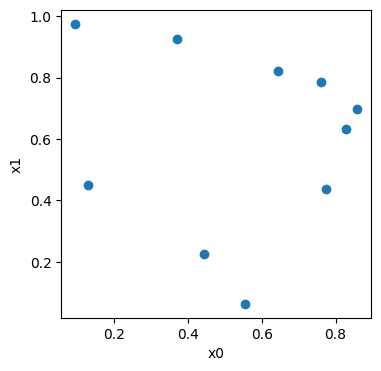

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))

df_random, _ = samples.to_pandas()
ax.scatter(df_random.iloc[:, 0], df_random.iloc[:, 1])
ax.set_xlabel(domain.input_names[0])
ax.set_ylabel(domain.input_names[1])